# Logistic regression
## Mateusz Baran
### 155620

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('../data/VLagun_Phys_Years3.csv')
df.head()

,PSU,O2,temp.,SS,DOC,TPOC,Windspeedinsitu,Depth,Years
0,3.757624,9.46,18.3,52.0,7.500,8.5650,3.5,3.3,0
1,3.504707,9.89,19.1,50.0,7.860,8.5200,0.0,3.6,0
2,3.757624,9.66,18.1,59.0,8.172,8.4915,1.0,3.4,0
3,3.107266,10.36,19.5,46.0,7.848,8.8320,0.0,2.9,0
4,2.619498,11.56,19.0,42.0,7.536,9.2400,0.0,3.0,0


In [7]:
X = df.drop(df.columns[-1], axis=1)
y = df[df.columns[-1]]

In [8]:
X.head()

,PSU,O2,temp.,SS,DOC,TPOC,Windspeedinsitu,Depth
0,3.757624,9.46,18.3,52.0,7.500,8.5650,3.5,3.3
1,3.504707,9.89,19.1,50.0,7.860,8.5200,0.0,3.6
2,3.757624,9.66,18.1,59.0,8.172,8.4915,1.0,3.4
3,3.107266,10.36,19.5,46.0,7.848,8.8320,0.0,2.9
4,2.619498,11.56,19.0,42.0,7.536,9.2400,0.0,3.0


In [9]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Years, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

In [12]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [13]:
print(f"Coefficient of model:\n{model.coef_}")

Coefficient of model:
[[-1.11390959 -0.51744997  0.66995948  0.14190605 -1.40851686 -0.90323359
   0.87916918 -0.14860516]]


In [14]:
print(f"Intercept of model:\n{model.intercept_}")

Intercept of model:
[1.29321581]


In [15]:
predict_train = model.predict(X_train)
print(f"Target on training set:\n {predict_train}")

Target on training set:
 [1 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 1
 0 0 1 1 0 1 1 0 1 0]


In [16]:
accuracy_train = accuracy_score(y_train, predict_train)
print(f"Accuracy score on training set:\n {accuracy_train}")

Accuracy score on training set:
 0.9880952380952381


In [17]:
predict_test = model.predict(X_test)
print(f"Target on test set:\n {predict_test}")

Target on test set:
 [1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1]


In [18]:
accuracy_test = accuracy_score(y_test, predict_test)
print(f"Accuracy score on test set:\n {accuracy_test}")

Accuracy score on test set:
 0.9444444444444444


Optimization terminated successfully.
         Current function value: 0.525584
         Iterations 6


<Axes: xlabel='SS', ylabel='Years'>

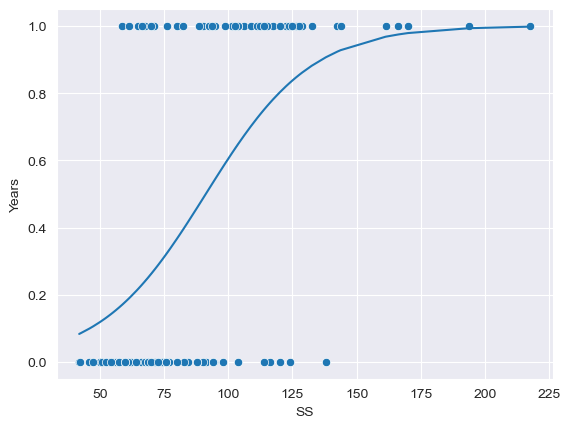

In [25]:
import statsmodels.api as sm
x = df['SS'].values.reshape(-1,1).flatten()
y = df['Years'].values.reshape(-1,1)

logit_model = sm.Logit(y, sm.add_constant(x))
result = logit_model.fit()

# Plot data and logistic regression curve
sns.scatterplot(x='SS', y='Years', data=df)
sns.lineplot(x=x, y=result.predict(sm.add_constant(x)))

Optimization terminated successfully.
         Current function value: 0.419377
         Iterations 7


<Axes: xlabel='Windspeedinsitu', ylabel='Years'>

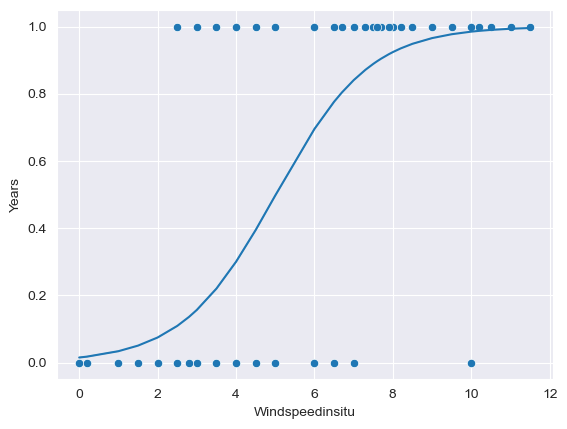

In [27]:
x = df['Windspeedinsitu'].values.reshape(-1,1).flatten()
y = df['Years'].values.reshape(-1,1)

logit_model = sm.Logit(y, sm.add_constant(x))
result = logit_model.fit()

# Plot data and logistic regression curve
sns.scatterplot(x='Windspeedinsitu', y='Years', data=df)
sns.lineplot(x=x, y=result.predict(sm.add_constant(x)))